<a href="https://colab.research.google.com/github/nucky707/-14-/blob/master/AE_Code_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from google.colab import files
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime
from __future__ import absolute_import, division, print_function, unicode_literals
import pprint

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import pandas as pd
tf.__version__

TensorFlow 1.x selected.


Using TensorFlow backend.


'1.15.2'

In [ ]:
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; ')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.49.38.250:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 4197720759478582829),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 14959591169089007633),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15445256146123441515),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 4788549293655038470),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8177921656109623453),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 15465415743754386891),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 13863582594188792314),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 7902758612966795485),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 328775386540

In [ ]:
files.upload()

Saving WeldDataSet-CleanFinal-McMaster.csv to WeldDataSet-CleanFinal-McMaster.csv


In [ ]:
data_set=pd.read_csv('WeldDataSet-CleanFinal-McMaster.csv')
print('the shape of original data is: ',np.shape(data_set))
data_set.describe()

the shape of original data is:  (4536, 1648)


,AVG_WELD_TEMP,STDEV_WELD_TEMP,MAX_WELD_TEMP,MIN_WELD_TEMP,AVG_WELD_CURRENT_FBK,STDEV_WELD_CURRENT_FBK,MAX_WELD_CURRENT_FBK,MIN_WELD_CURRENT_FBK,AVG_WELD_VOLTAGE,STDEV_WELD_VOLTAGE,MAX_WELD_VOLTAGE,MIN_WELD_VOLTAGE,AVG_CARRIAGE_POS,STDEV_CARRIAGE_POS,MAX_CARRIAGE_POS,MIN_CARRIAGE_POS,AVG_OSCLAMP_VAL,STDEV_OSCLAMP_VAL,MAX_OSCLAMP_VAL,MIN_OSCLAMP_VAL,AVG_DSCLAMP_VAL,STDEV_DSCLAMP_VAL,MAX_DSCLAMP_VAL,MIN_DSCLAMP_VAL,AVG_CENTR1_POS,STDEV_CENTR1_POS,MAX_CENTR1_POS,MIN_CENTR1_POS,AVG_CENTR2_POS,STDEV_CENTR2_POS,MAX_CENTR2_POS,MIN_CENTR2_POS,AVG_CENTR3_POS,STDEV_CENTR3_POS,MAX_CENTR3_POS,MIN_CENTR3_POS,AVG_CENTR4_POS,STDEV_CENTR4_POS,MAX_CENTR4_POS,MIN_CENTR4_POS,...,CEN2_POSI_161,CEN2_POSI_162,CEN2_POSI_163,CEN2_POSI_164,CEN2_POSI_165,CEN2_POSI_166,CEN2_POSI_167,CEN2_POSI_168,CEN2_POSI_169,CEN2_POSI_170,CEN2_POSI_171,CEN2_POSI_172,CEN2_POSI_173,CEN2_POSI_174,CEN2_POSI_175,CEN2_POSI_176,CEN2_POSI_177,CEN2_POSI_178,CEN2_POSI_179,CEN2_POSI_180,CEN2_POSI_181,CEN2_POSI_182,CEN2_POSI_183,CEN2_POSI_184,CEN2_POSI_185,CEN2_POSI_186,CEN2_POSI_187,CEN2_POSI_188,CEN2_POSI_189,CEN2_POSI_190,CEN2_POSI_191,CEN2_POSI_192,CEN2_POSI_193,CEN2_POSI_194,CEN2_POSI_195,CEN2_POSI_196,CEN2_POSI_197,CEN2_POSI_198,CEN2_POSI_199,CEN2_POSI_200
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.00000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,...,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,1036.726957,92.095954,1111.637566,752.639771,2233.179559,116.562133,2283.098150,1820.797466,1.225278,0.099760,1.360526,0.593434,45193.24095,27108.357863,89799.851499,739.841659,-3.445842,27.052578,2.181587,-208.723926,-3.075137,27.189887,2.816054,-209.236794,237.750660,107.042655,365.944115,14.019778,233.707138,100.370452,380.156791,17.952950,207.526469,81.070437,303.952814,17.005995,166.984504,70.871521,251.553409,8.542752,...,245.389330,239.862654,234.118386,228.693122,222.866402,217.139109,211.363095,205.605820,199.791005,194.078483,188.407848,182.550926,176.801367,171.038360,165.327601,159.481922,153.732804,147.932981,142.189594,136.567901,130.690697,125.093695,119.285053,113.523148,107.861332,102.078483,96.389330,90.731481,84.958554,79.235009,73.308422,67.718695,62.037037,56.248457,50.200176,44.428131,39.152778,33.316578,28.304012,22.375220
std,32.799208,40.991379,47.276018,142.312814,277.194939,214.988406,277.918881,851.455025,0.101889,0.027567,0.133317,0.206326,2483.67859,1660.428932,4662.406742,496.739696,1.119402,4.251437,0.084889,16.479746,1.172068,4.261442,0.218442,16.514292,52.299839,35.384047,98.806549,2.508494,56.154974,35.933337,100.025351,3.330184,71.900790,38.428803,100.415912,3.891729,71.909038,36.783446,99.167046,0.865357,...,25.725429,25.304973,24.722002,24.158886,23.753201,23.241265,22.667118,22.307875,21.810246,21.244417,20.859785,20.290135,19.694536,19.112245,18.522403,17.911891,17.184710,16.540683,16.031370,15.504647,14.849254,14.229147,13.673548,13.097746,12.579430,11.984923,11.249642,10.813289,10.220935,9.717572,9.125289,8.680499,8.548013,7.878473,7.455243,6.399672,6.690003,5.658051,6.402173,4.694114
min,857.130000,6.550200,963.000000,611.000000,1527.140000,1.848210,1640.550000,6.000000,0.996443,0.028158,1.083980,0.102539,1451.10000,776.7020

In [ ]:
print(np.shape(data_set))
print(data_set)

(4536, 1648)
             I_TIMESTAMP  AVG_WELD_TEMP  ...  CEN2_POSI_199  CEN2_POSI_200
0         3/17/2020 8:06        1069.76  ...             17             17
1         3/17/2020 7:53        1085.18  ...             26             26
2         3/17/2020 7:40        1079.10  ...             19             19
3         3/17/2020 7:30        1039.13  ...             23             23
4         3/17/2020 7:17        1041.72  ...             17             17
...                  ...            ...  ...            ...            ...
4531     01/01/2020 0:51        1026.64  ...             30             17
4532     01/01/2020 0:39        1021.43  ...             37             37
4533  BROKEN_1_13_Jan_19        1063.52  ...             71             54
4534  BROKEN_2_16_Jan_19        1017.78  ...             57             52
4535  BROKEN_3_23_Feb_20        1004.43  ...             34             21

[4536 rows x 1648 columns]


In [ ]:
#split data to two classes:
data_set=data_set.drop(['I_TIMESTAMP'],axis=1)
data_set=pd.DataFrame.to_numpy(data_set,dtype=np.float64)
data_set_normal=data_set[0:4533,1:47]
data_set_anomaly=data_set[4533:4536,1:47]
data_set_anomaly_1=data_set[4533:4535,1:47]
data_set_anomaly_2=data_set[4535:4536,1:47]
print('the shape of training data is: ',np.shape(data_set_normal))
print('the shape of testing data is: ',np.shape(data_set_anomaly))
print('the shape of anomaly_1 data is: ',np.shape(data_set_anomaly_1))
print('the shape of anomaly_2 data is: ',np.shape(data_set_anomaly_2))

the shape of training data is:  (4533, 46)
the shape of testing data is:  (3, 46)
the shape of anomaly_1 data is:  (2, 46)
the shape of anomaly_2 data is:  (1, 46)


In [ ]:
print(data_set_anomaly_1)

[[ 9.80986e+01  1.11400e+03  6.14000e+02  1.67660e+03  2.94080e+02
   1.80700e+03  2.67000e+02  1.35395e+00  1.19570e-01  1.52832e+00
   4.98047e-01  1.45110e+03  7.86163e+02  2.50300e+03  1.01000e+02
  -6.07897e+00  3.39608e+01  2.28092e+00 -2.15170e+02 -5.51270e+00
   3.41542e+01  3.25521e+00 -2.15575e+02  2.89216e+02  1.49088e+02
   4.81000e+02  1.50000e+01  3.05991e+02  1.47564e+02  5.18000e+02
   2.00000e+01  3.41365e+02  1.39082e+02  4.47000e+02  1.80000e+01
   3.47025e+02  1.40597e+02  4.60000e+02  1.60000e+01  1.59000e+02
   1.64840e+02  9.20000e+02  9.23796e+02  6.00000e+00  6.00000e+00
   2.10125e+02]
 [ 1.03838e+02  1.08400e+03  6.76000e+02  1.68381e+03  1.09582e+01
   1.71500e+03  1.67300e+03  1.31378e+00  6.73417e-02  1.38184e+00
   9.76563e-01  1.45465e+03  7.76702e+02  2.49900e+03  1.19000e+02
  -7.21245e+00  3.71122e+01  2.12309e+00 -2.14297e+02 -6.66559e+00
   3.72752e+01  3.14985e+00 -2.14716e+02  2.68074e+02  1.34599e+02
   4.33000e+02  1.40000e+01  2.84187e+02  1.33

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_set_normal)
data_set_normal=scaler.transform(data_set_normal)
data_set_anomaly=scaler.transform(data_set_anomaly)
data_set_anomaly_1=scaler.transform(data_set_anomaly_1)
data_set_anomaly_2=scaler.transform(data_set_anomaly_2)
print(data_set_normal)

[[-0.6522226  -0.01381111  0.64148604 ...  0.42965882  0.4368858
  -1.34711143]
 [-1.84718778  0.02849008  2.14513286 ...  0.42965882  0.4368858
  -1.34711143]
 [-1.77529064  0.02849008  2.07486899 ...  0.42965882  0.4368858
  -1.34711143]
 ...
 [-0.56095419 -1.02903952 -0.40544563 ...  1.56365792  1.57211269
  -1.491293  ]
 [-0.03189791 -1.00788893 -0.67947472 ...  1.56365792  1.57211269
  -1.491293  ]
 [-1.49697553  0.64185724  1.203597   ...  1.56365792  1.57211269
  -1.491293  ]]


In [ ]:
#model building:
#creat autoencoder_with_mse function

input_dim=data_set_normal.shape[1]

#using 19 for encoding dimension:
encoding_dim=20

#define input placeholder:
input_img=tf.keras.Input((input_dim,))

#define encoder:
encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)

#define decoder:
decoded=tf.keras.layers.Dense(input_dim,activation='relu')(encoded)

#define autoencoder:
autoencoder_with_mse=tf.keras.Model(input_img,decoded)

#plot model architecture:
autoencoder_with_mse.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense (Dense)                (None, 20)                940       
_________________________________________________________________
dense_1 (Dense)              (None, 46)                966       
Total params: 1,906
Trainable params: 1,906
Non-trainable params: 0
_________________________________________________________________


#shuffle dataset and observe result trend

In [ ]:
#shuffle dataset for 5 times:

test_dim=[]
mse_mean=[]

#shuffle normal data:
for i in range(5):
  test_dim.append(i+1)
  np.random.shuffle(data_set_normal)
  #split normal data:
  from sklearn.model_selection import train_test_split
  data_set_normal_train,data_set_normal_test=train_test_split(data_set_normal,test_size=0.2,random_state=55)

  #using 20% normal data & 3 anomaly data as test data
  data_set_anomaly_test=np.concatenate((data_set_normal_test,data_set_anomaly),axis=0)

  #modle training:
  autoencoder_with_mse.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
  autoencoder_with_mse.fit(data_set_normal_train,data_set_normal_train,epochs=100,batch_size=256)

  #testing:
  test_result=[]
  mse_total=0
  for j in range(907):
    test_loss,test_acc = autoencoder_with_mse.evaluate(data_set_anomaly_test[j:j+1,:],data_set_anomaly_test[j:j+1,:])
    test_result.append(test_loss)
    mse_total=mse_total+test_result[j]
  mse_mean.append(mse_total/907)

流式输出内容被截断，只能显示最后 5000 行内容。
1/1 [==============================] - 0s 1ms/sample - loss: 0.4855 - acc: 1.0000
Train on 3626 samples
Epoch 1/100
3626/3626 [==============================] - 0s 19us/sample - loss: 0.4806 - acc: 0.8183
Epoch 2/100
3626/3626 [==============================] - 0s 10us/sample - loss: 0.4805 - acc: 0.8114
Epoch 3/100
3626/3626 [==============================] - 0s 7us/sample - loss: 0.4804 - acc: 0.8130
Epoch 4/100
3626/3626 [==============================] - 0s 8us/sample - loss: 0.4803 - acc: 0.8138
Epoch 5/100
3626/3626 [==============================] - 0s 8us/sample - loss: 0.4803 - acc: 0.8221
Epoch 6/100
3626/3626 [==============================] - 0s 8us/sample - loss: 0.4803 - acc: 0.8180
Epoch 7/100
3626/3626 [==============================] - 0s 8us/sample - loss: 0.4802 - acc: 0.8177
Epoch 8/100
3626/3626 [==============================] - 0s 8us/sample - loss: 0.4802 - acc: 0.8213
Epoch 9/100
3626/3626 [==============================] - 0s 8us/sam

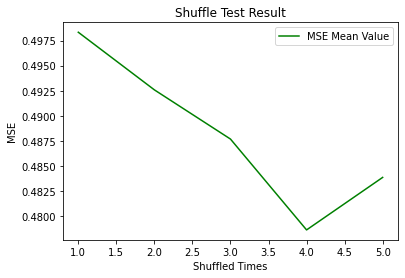

In [ ]:
#plot result:
plt.figure()
plt.title('Shuffle Test Result')
plt.xlabel('Shuffled Times')
plt.ylabel('MSE')
plt.plot(test_dim[0:910], mse_mean[0:910],color='green', label='MSE Mean Value')
#plt.ylim((0, 5))
plt.legend()

In [ ]:
print(mse_mean)

[0.49832953079352044, 0.49258400467784036, 0.48767791830553636, 0.478618218921856, 0.48385495687562813]
